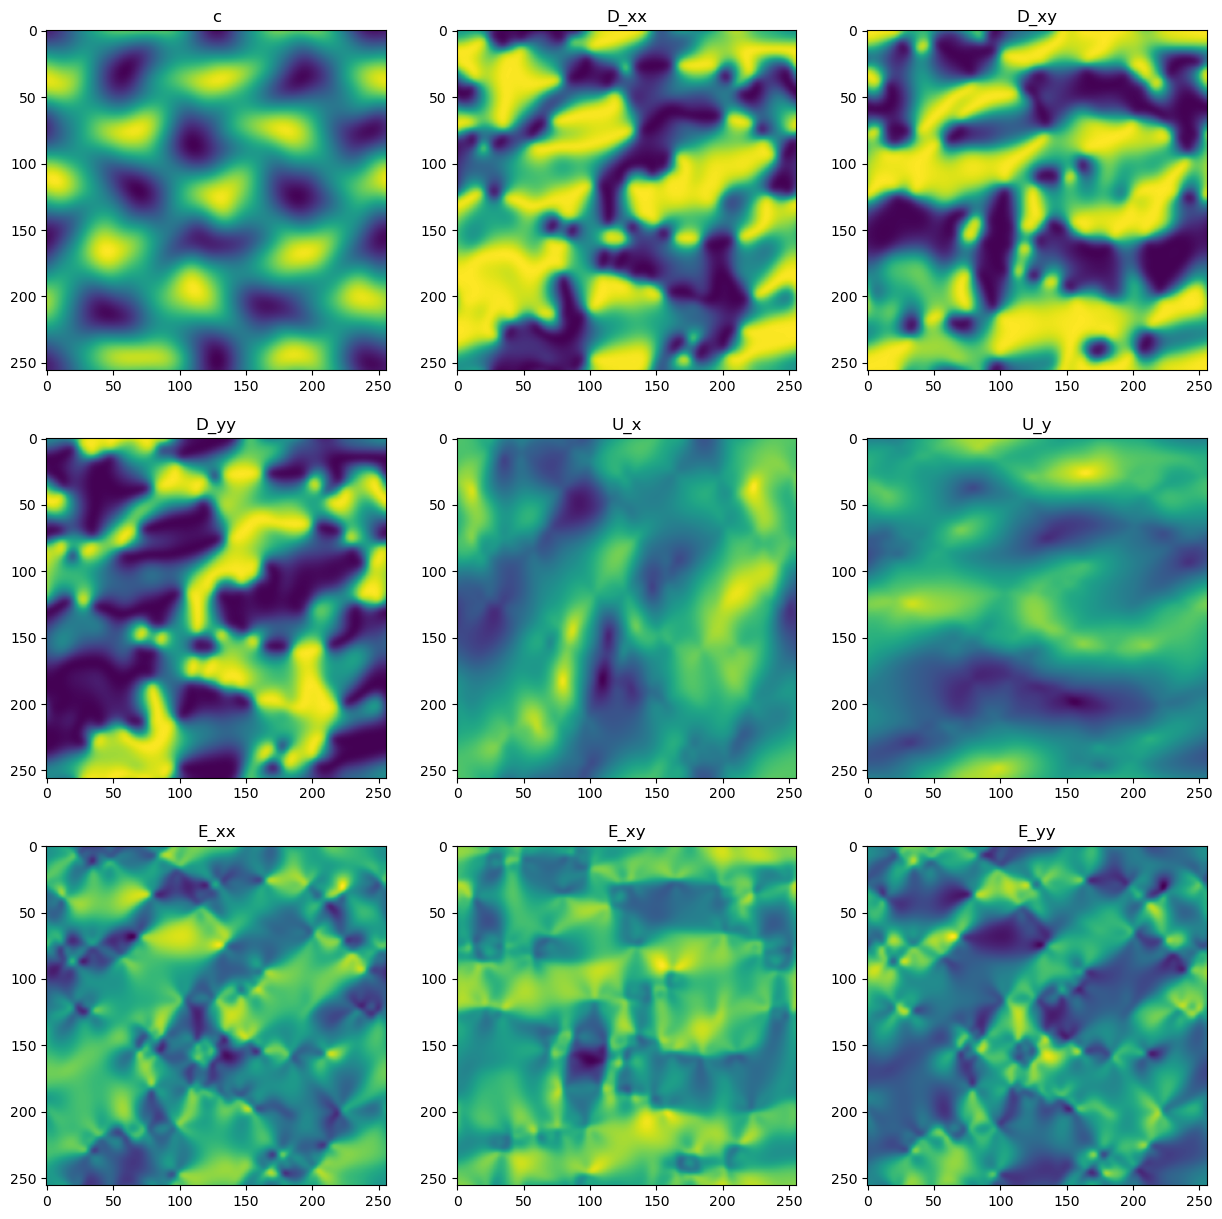

In [2]:
#loading the data from the HDF5 file:
import h5py
import matplotlib.pyplot as plt

zeta = 5.0 # choose values from [1.0, 3.0, 5.0, 7.0, 9.0, 11.0, 13.0, 15.0];
alpha = -1.0 ; # choose values from [-1.0, -3.0, -4.0, -5.0]

with h5py.File('data/L_10.0_zeta_'+str(zeta)+'_alpha_'+str(alpha)+'.hdf5', 'r') as f:
    c = f['c'][:]
    D_xx = f['D_xx'][:]
    D_xy = f['D_xy'][:]
    D_yy = f['D_yy'][:]
    U_x = f['U_x'][:]
    U_y = f['U_y'][:]
    E_xx = f['E_xx'][:]
    E_xy = f['E_xy'][:]
    E_yy = f['E_yy'][:]
    t = f['time'][:]
#plot all fields in a subplot:
seed = 1
time = 15

fig, ax = plt.subplots(3,3, figsize=(15,15))
ax[0,0].imshow(c[seed,time,:,:])
ax[0,0].set_title('c')
ax[0,1].imshow(D_xx[seed,time,:,:])
ax[0,1].set_title('D_xx')
ax[0,2].imshow(D_xy[seed,time,:,:])
ax[0,2].set_title('D_xy')
ax[1,0].imshow(D_yy[seed,time,:,:])
ax[1,0].set_title('D_yy')
ax[1,1].imshow(U_x[seed,time,:,:])
ax[1,1].set_title('U_x')
ax[1,2].imshow(U_y[seed,time,:,:])
ax[1,2].set_title('U_y')
ax[2,0].imshow(E_xx[seed,time,:,:])
ax[2,0].set_title('E_xx')
ax[2,1].imshow(E_xy[seed,time,:,:])
ax[2,1].set_title('E_xy')
ax[2,2].imshow(E_yy[seed,time,:,:])
ax[2,2].set_title('E_yy');


In [47]:
import os
import imageio
import numpy as np
import matplotlib.pyplot as plt
import shutil
from tqdm import tqdm
def create_gif(time_series, saving_directory, name_file = 'concentration', delete_imgs=False):
    time_series_min = time_series.min()
    time_series_max = time_series.max()
    if time_series.ndim > 3:
        #error:
        print('Error: The time series should be (time, height, width)')
        return
    if not os.path.exists(saving_directory + '/img_for_gif'):
        os.makedirs(saving_directory + '/img_for_gif')
    images = []
    for i in range(time_series.shape[0]):
        plt.imshow(time_series[i], origin='lower', vmin=time_series_min, vmax=time_series_max);
        #plt.show()
        plt.axis('off')
        plt.savefig(saving_directory + f'/img_for_gif/time_series_{i}.png', bbox_inches='tight', pad_inches=0)
        plt.close()
        images.append(imageio.imread(saving_directory + f'/img_for_gif/time_series_{i}.png'))

    imageio.mimsave(saving_directory + '/' + name_file + '.gif', images, duration=0.1)
    if delete_imgs:
        shutil.rmtree(saving_directory + '/img_for_gif')

In [49]:
create_gif(U_y[3], 'gif_data', name_file='U_y', delete_imgs=True)

/tmp/ipykernel_3863145/3020939748.py:23: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(saving_directory + f'/img_for_gif/time_series_{i}.png'))


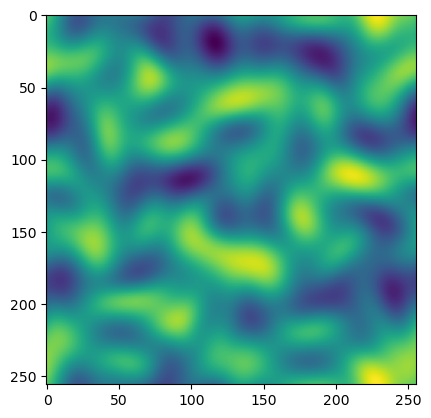

In [36]:
plt.imshow(c[3,15])

In [42]:
c[3,10].min()

0.9914281